HR_Attrition_Analytics Problem Statement: Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
import scipy
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import pickle
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df=pd.DataFrame(df)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# EDA Process

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


There is a difference between 75% and max in YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion,YearsSinceLastPromotion. So Outliers might be present.Let us check on the same

# Checking Null Values

In [8]:
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

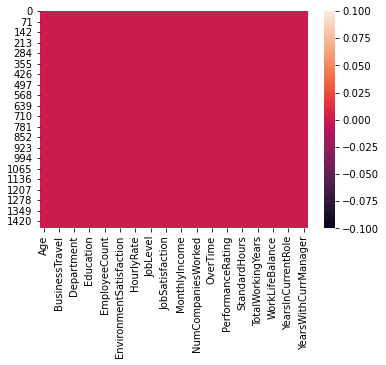

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
df['MonthlyIncome']

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64

This has no null values

# Univariate Analysis

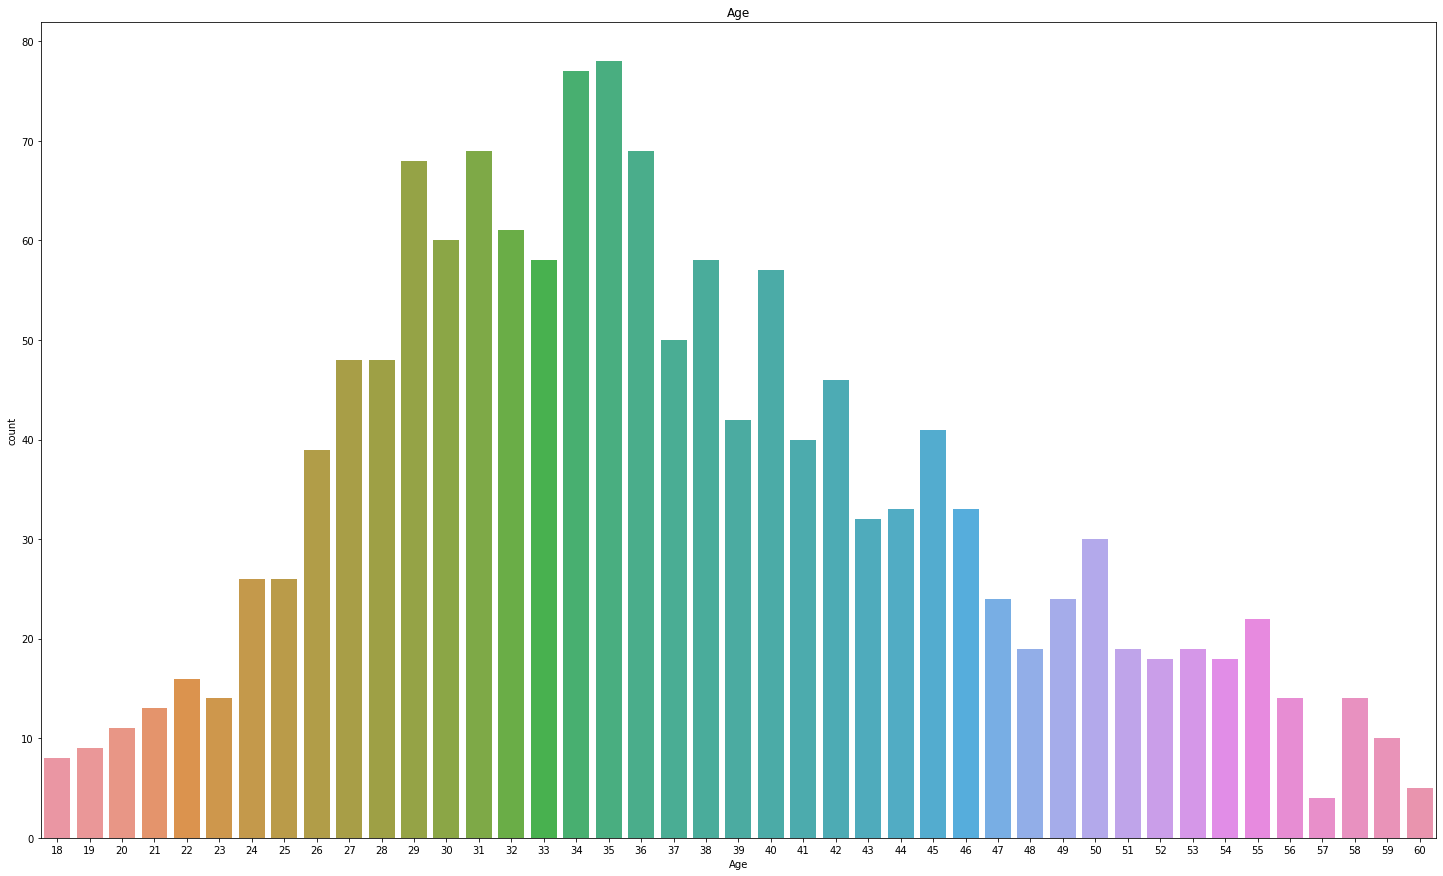

In [12]:
plt.figure(figsize=(25,15))
sns.countplot(x='Age',data=df)
plt.title('Age')
plt.show()

Most of the employees are aged between 27 and 45

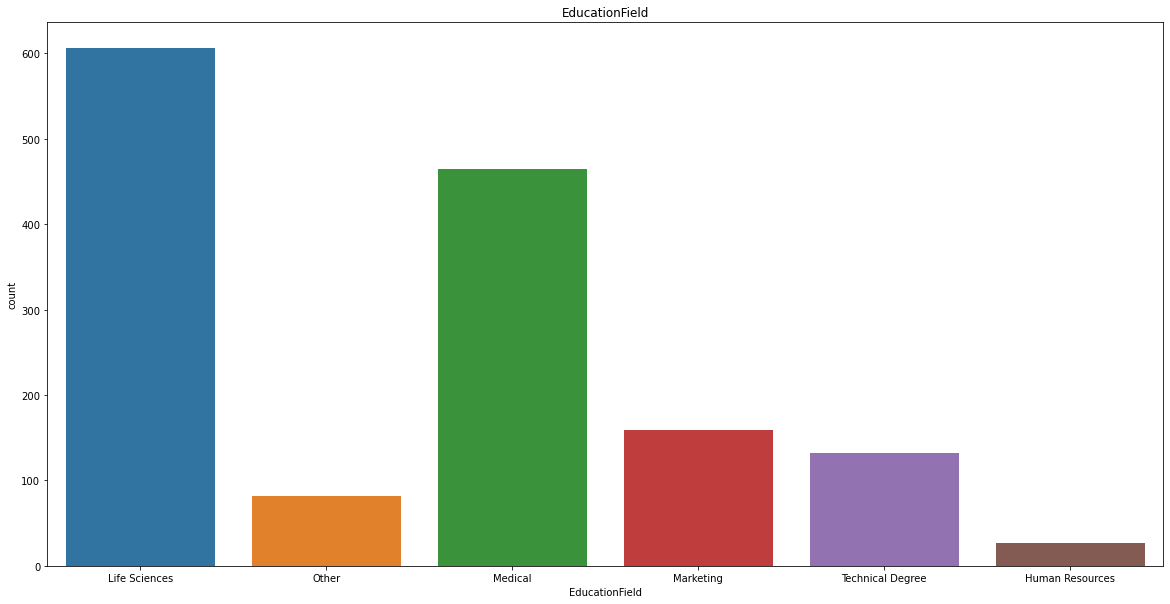

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x='EducationField',data=df)
plt.title('EducationField')
plt.show()

Most of the employees are from Life Sciences education field.

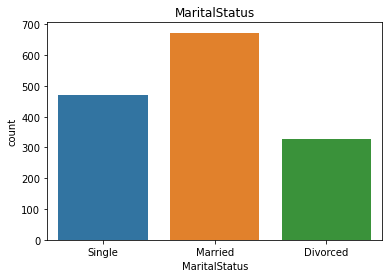

In [14]:
sns.countplot(x='MaritalStatus',data=df)
plt.title('MaritalStatus')
plt.show()

Most of the employees Marital Status is married.

# Bivariate Analysis

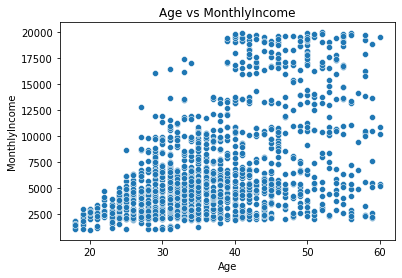

In [17]:
sns.scatterplot(x=df['Age'],y=df['MonthlyIncome'],data=df)
plt.title('Age vs MonthlyIncome')
plt.show()

MonthlyIncome increases as per the age.

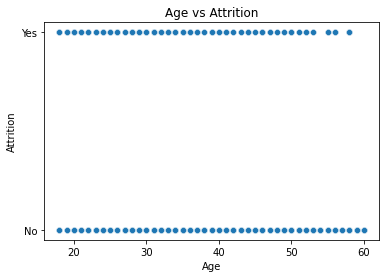

In [18]:
sns.scatterplot(x=df['Age'],y=df['Attrition'],data=df)
plt.title('Age vs Attrition')
plt.show()


There is not much relation between age and attrition.

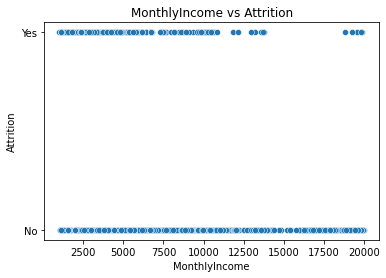

In [19]:
sns.scatterplot(x=df['MonthlyIncome'],y=df['Attrition'],data=df)
plt.title('MonthlyIncome vs Attrition')
plt.show()

Below 13000 Monthly income Attrition is there. And between 19000 to 20000 some Attrition is present.

# Label Encoding - Let us convert all string values to numeric values

In [20]:
le=LabelEncoder()

list1=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [21]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Multivariate Analysis

Correlation

In [22]:
dfcorr=df.corr()
dfcorr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


<AxesSubplot:>

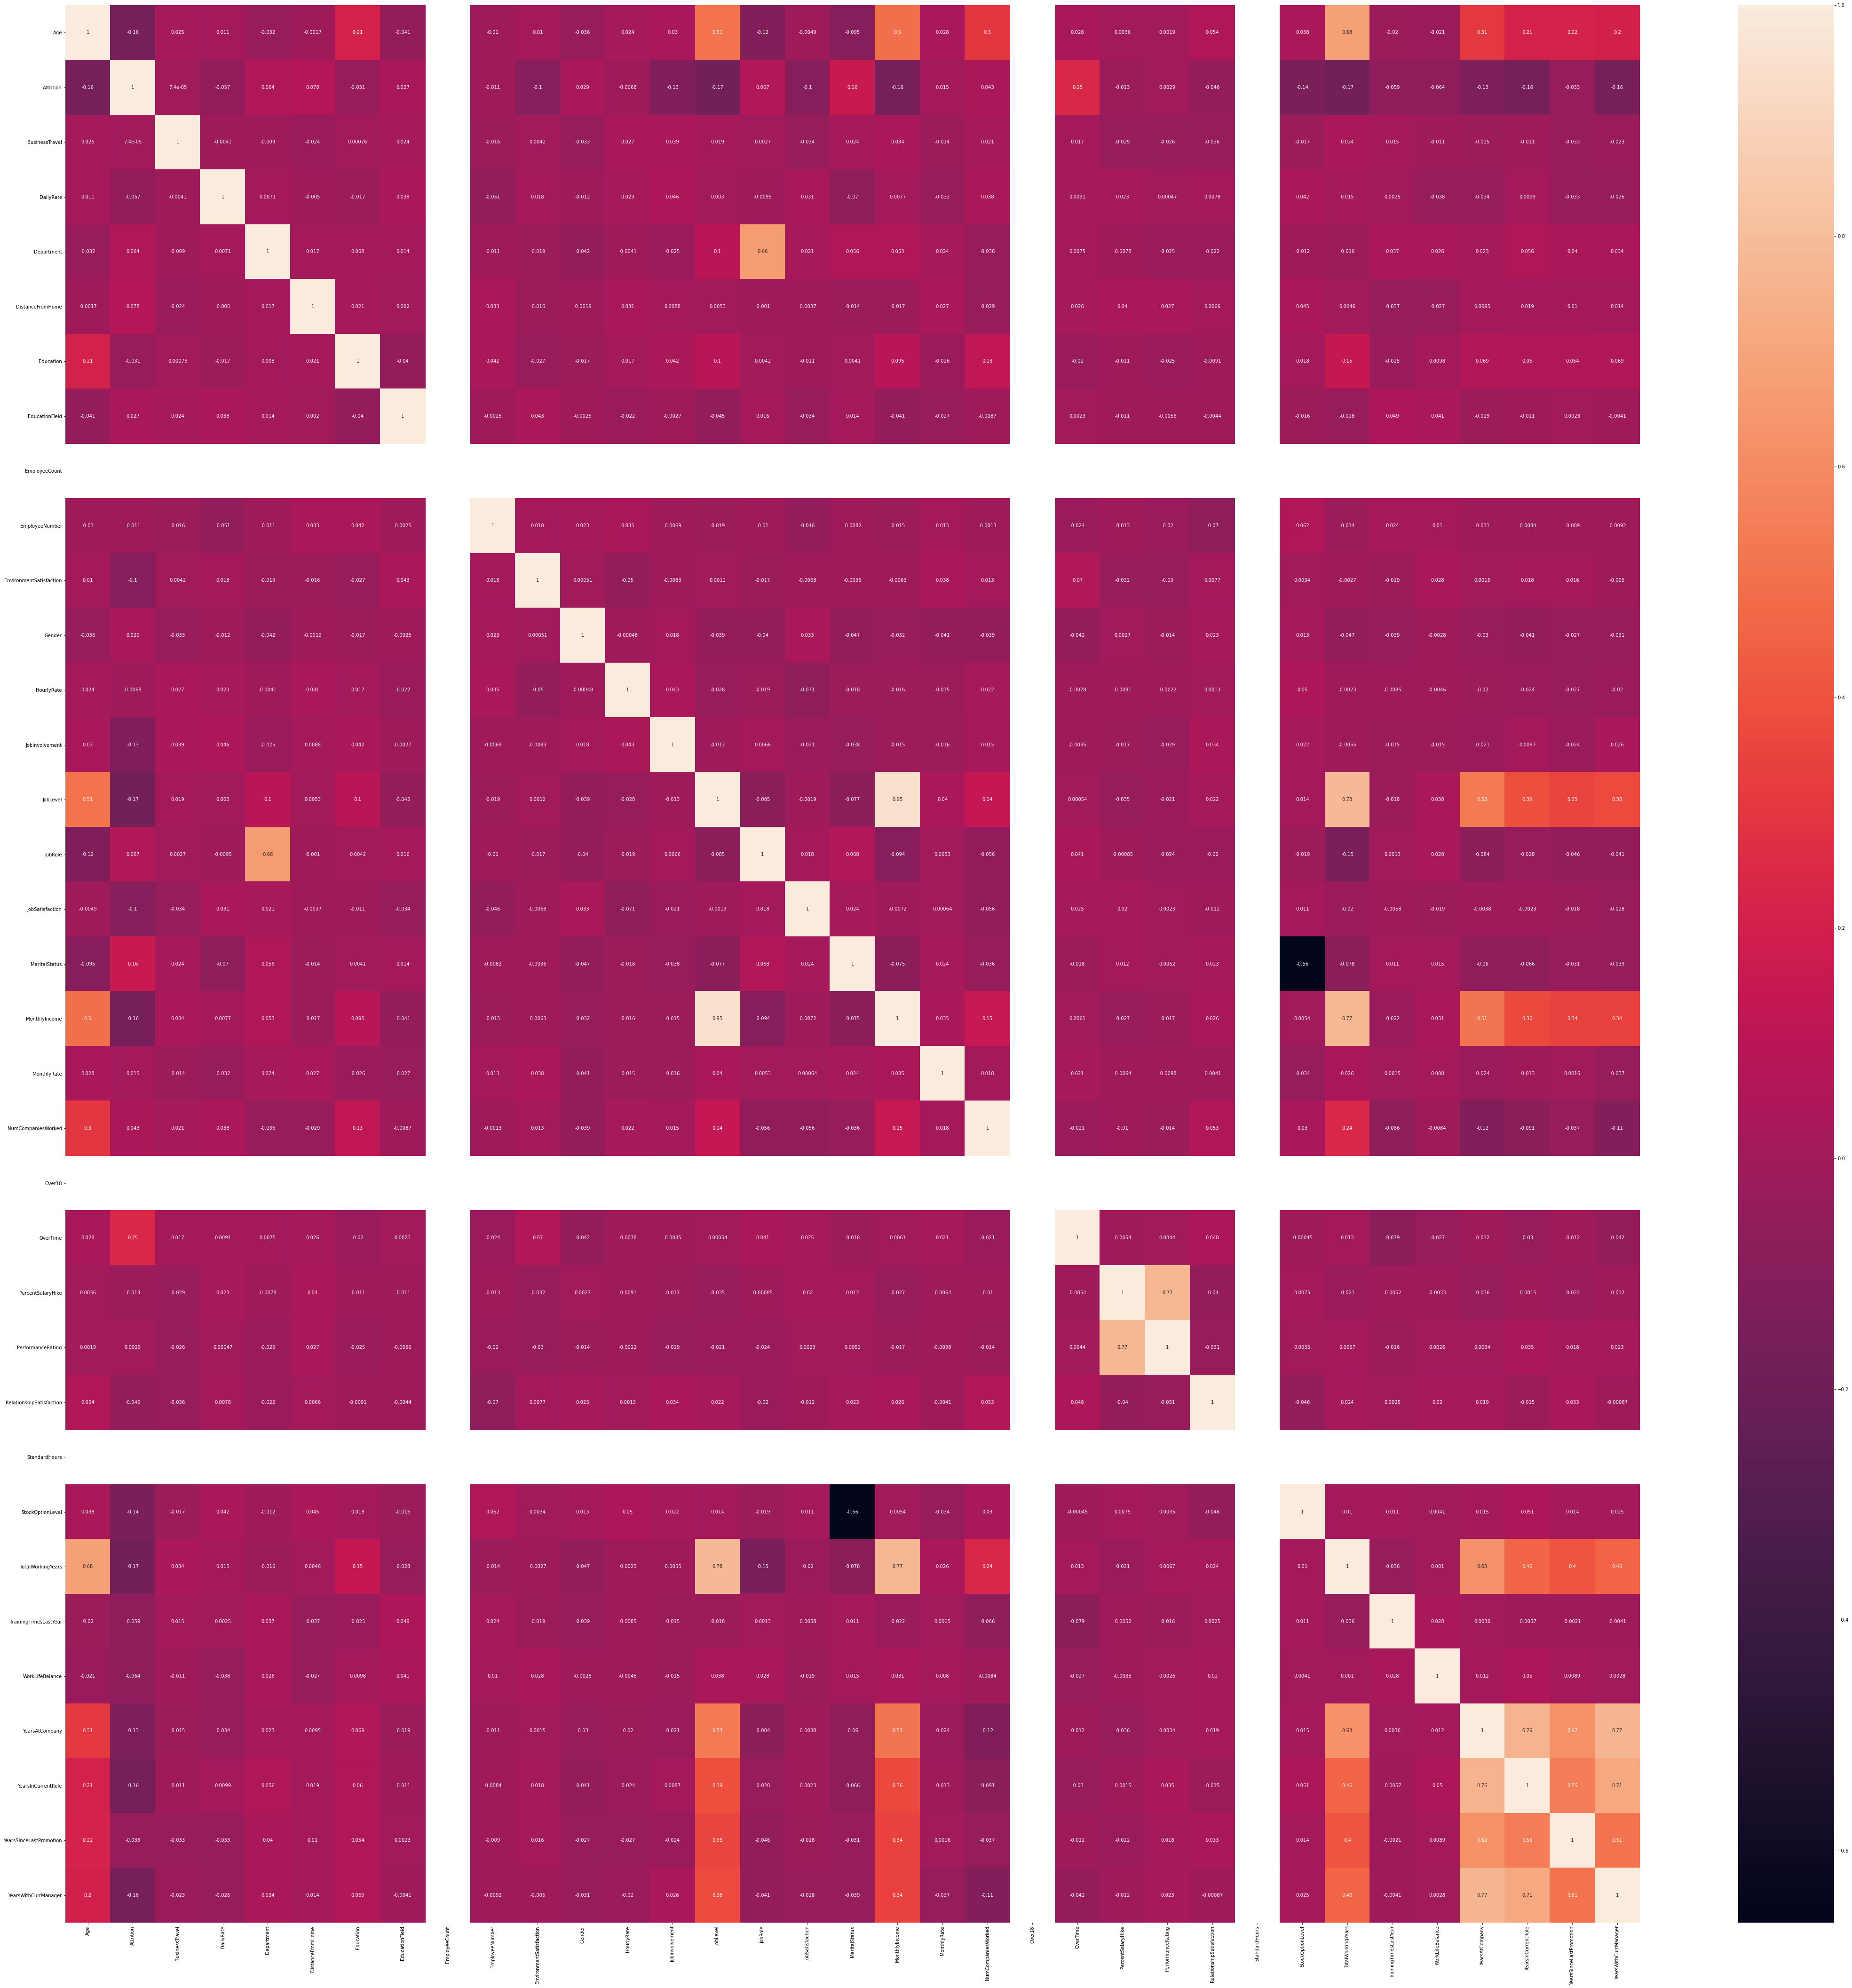

In [23]:
plt.figure(figsize=(75,75))
sns.heatmap(dfcorr,annot=True)

EmployeeCount,Over18,StandardHours are of same values in this model.Let's drop these columns.

In [29]:
df.drop(['EmployeeNumber'],axis=1,inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


<AxesSubplot:>

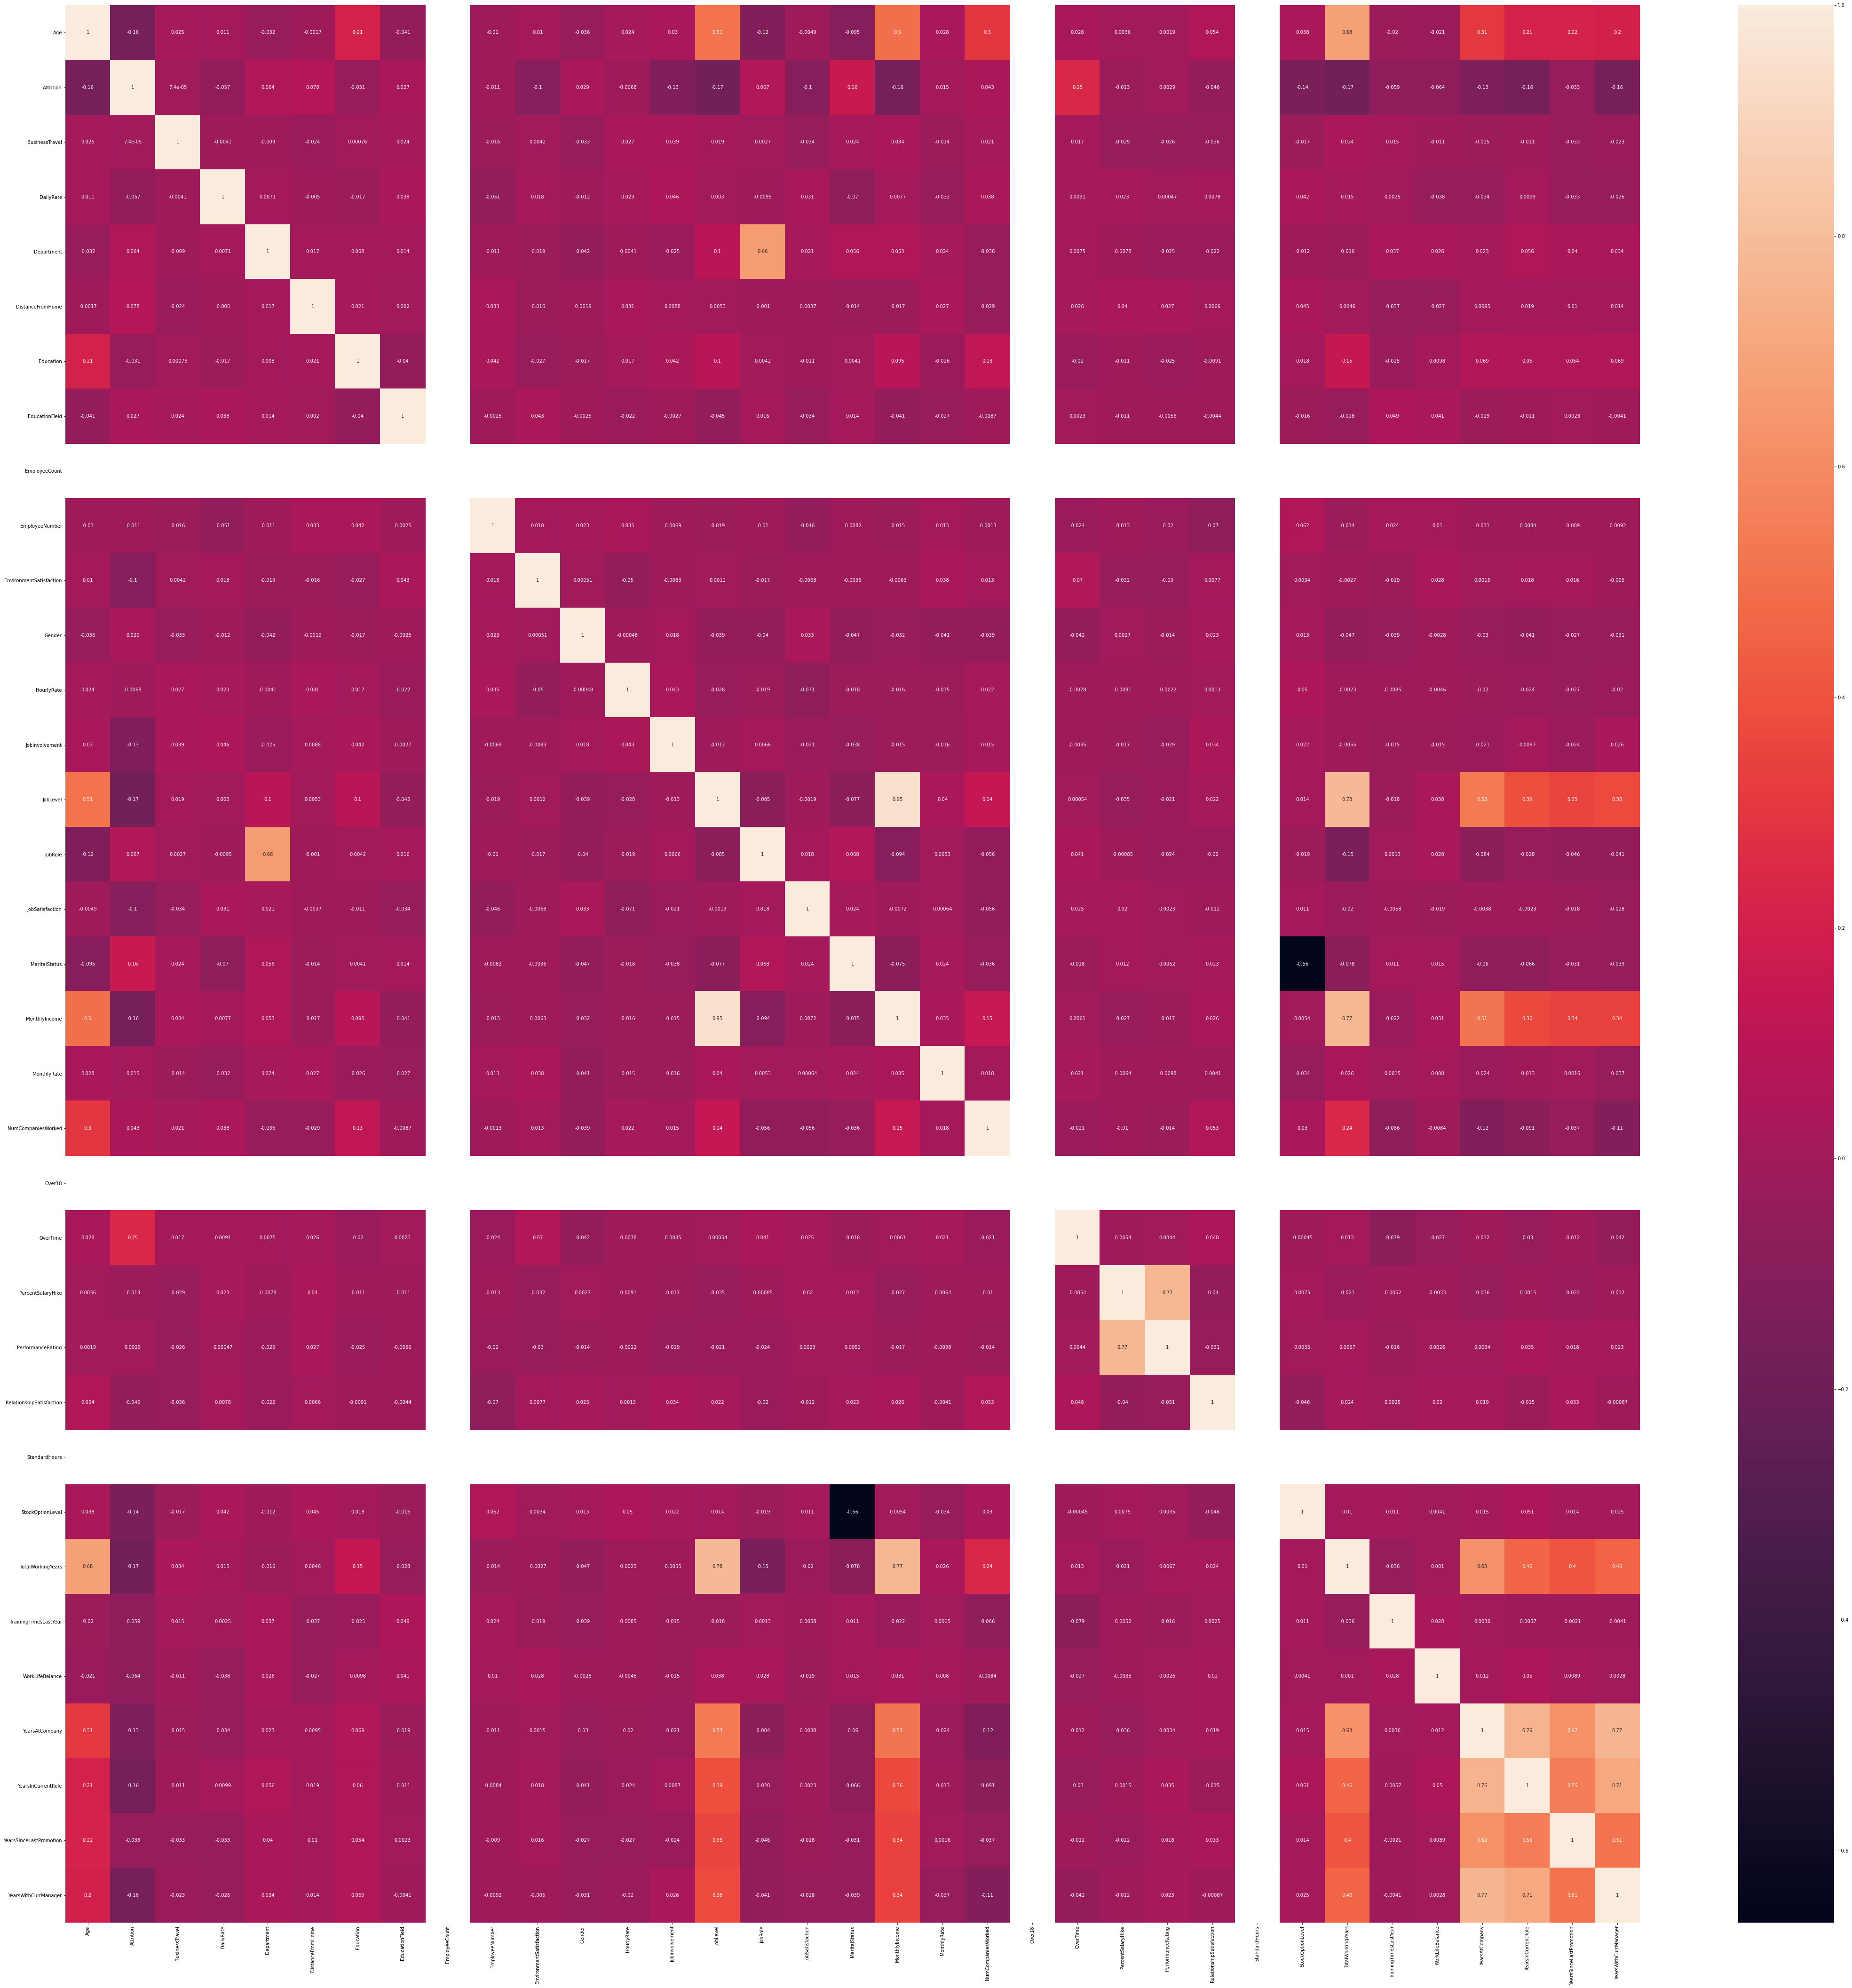

In [30]:
plt.figure(figsize=(75,75))
sns.heatmap(dfcorr,annot=True)

# Checking Outliers

In [31]:
df.shape

(1470, 31)

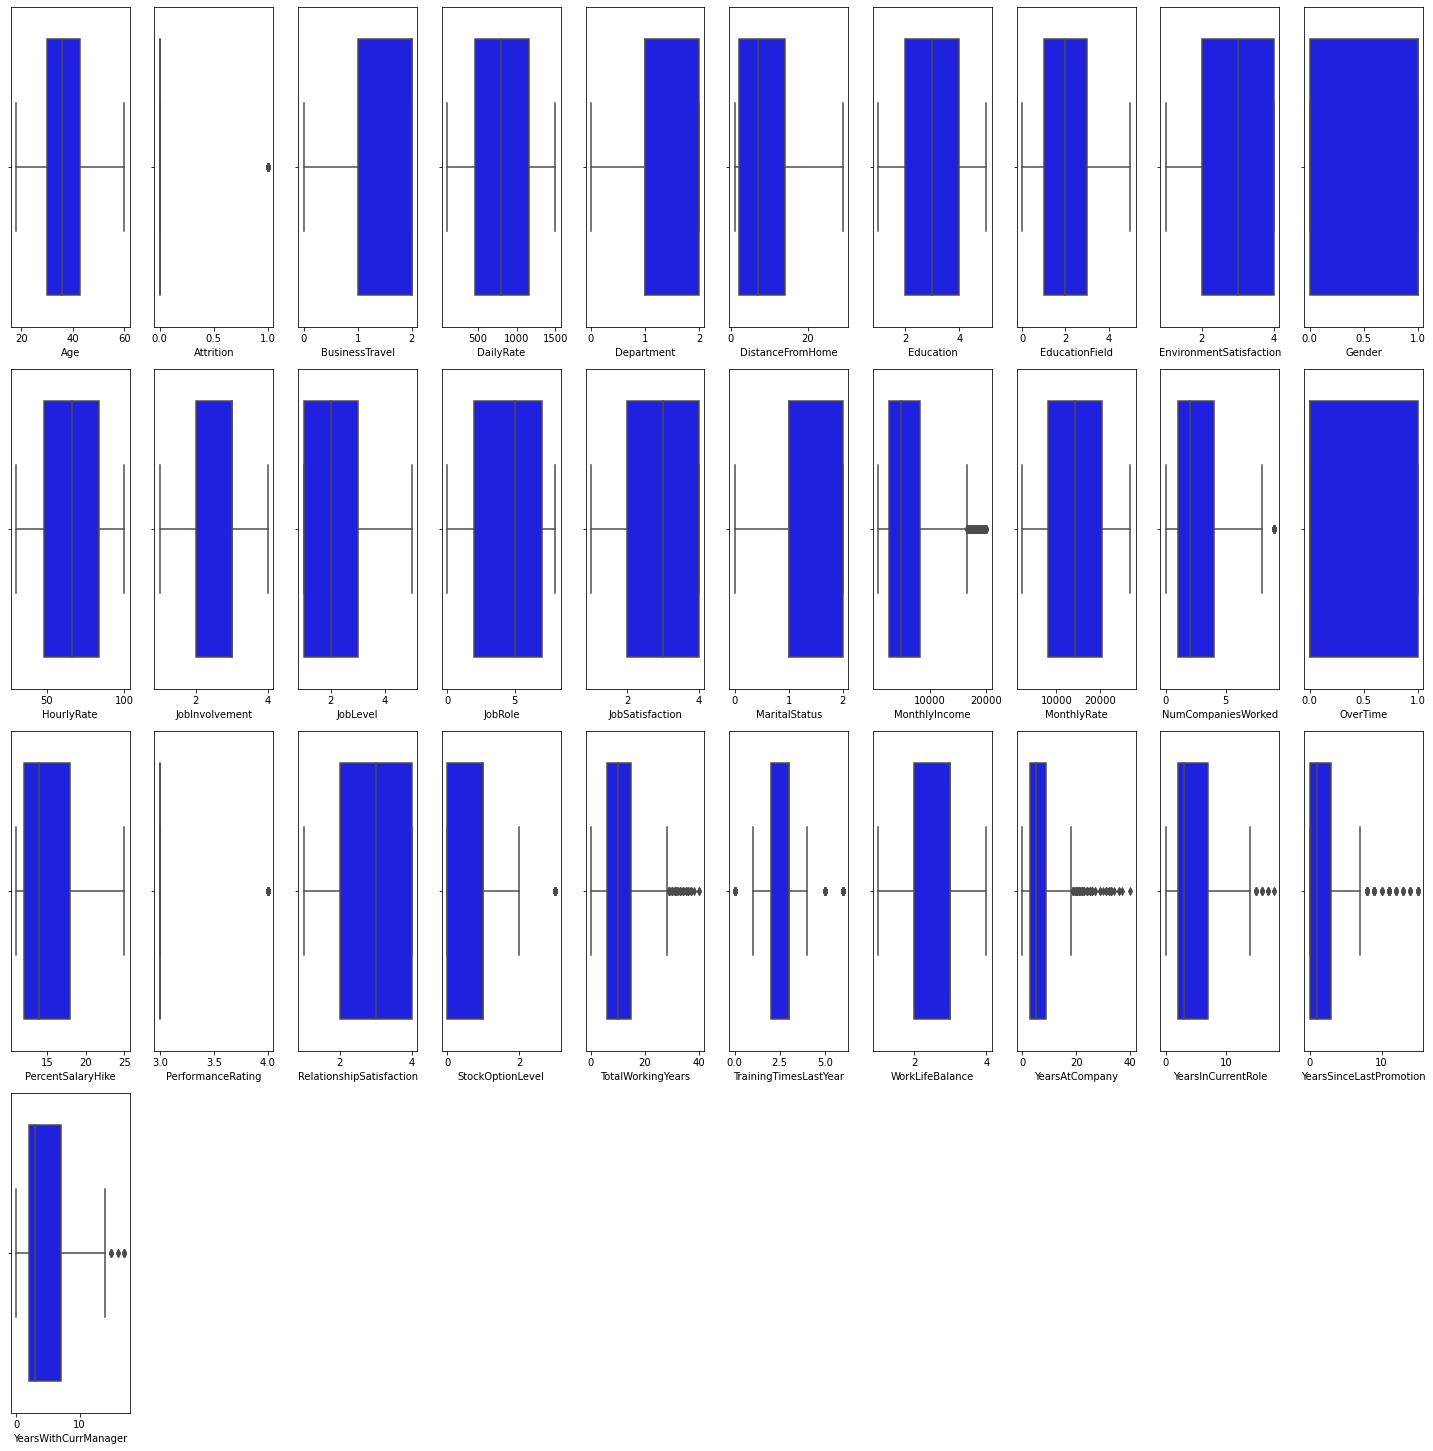

In [32]:
collist=df.columns.values
ncol=10
nrows=10

plt.figure(figsize=(2*ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='blue',orient='h')
    plt.tight_layout()

There is so many outliers in MonthlyIncome, TotalWorkingYears,YearsatCompany,Yearssincelastpromotion.

# Removal of Outliers - Z score Method

In [33]:
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]

new_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [34]:
new_df.shape

(1387, 31)

In [35]:
#Percentage loss in data
Percentage=(1470-1387)*100/1470
Percentage

5.64625850340136

5.65% is ok for removing outliers from dataset

# Checking Skewness

In [36]:
new_df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [37]:
new_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


# Moving the Target variable Attrition to the first column

In [38]:
columns=list(new_df.columns)
columns

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [39]:
columns[0],columns[1]=columns[1],columns[0]

In [40]:
new_df=new_df[columns]
new_df

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,0,49,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,1,37,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,0,33,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,0,27,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,0,39,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,0,27,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,0,49,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


# Preparation of Input and Target Variables for Model Training

In [41]:
x=new_df.iloc[:,1:]
x


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,...,3,4,0,17,3,2,9,6,0,8


In [42]:
y=pd.DataFrame(new_df.iloc[:,0])
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


# Scaling the Input Data

In [43]:
scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)
scaled_x

array([[ 0.5366811 ,  0.59312579,  0.73432467, ...,  0.04090327,
        -0.71069889,  0.36826963],
       [ 1.44211114, -0.90535412, -1.30776866, ...,  0.96589518,
        -0.31047991,  0.9821999 ],
       [ 0.08396607,  0.59312579,  1.40675151, ..., -1.19241928,
        -0.71069889, -1.16655603],
       ...,
       [-1.04782149,  0.59312579, -1.61544736, ..., -0.575758  ,
        -0.71069889, -0.24566063],
       [ 1.44211114, -0.90535412,  0.53830356, ...,  0.65756454,
        -0.71069889,  1.28916503],
       [-0.2555702 ,  0.59312579, -0.44180199, ..., -0.26742737,
        -0.31047991, -0.55262577]])

# The Target Variable has binary value, so this model will be Classification Type

# Finding Best Random State

In [44]:
best_r_state=0
accu=0

for i in range(60,400):
    train_x,test_x,train_y,test_y=train_test_split(scaled_x,y,test_size=0.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(train_x,train_y)
    pred_y=mod.predict(test_x)
    tempaccu=r2_score(test_y,pred_y)
    if tempaccu>accu:
        accu=tempaccu
        best_r_state=i

print(f"Best random_state {best_r_state}")

Best random_state 221


# Multiple Algorithms

In [45]:
train_x,test_x,train_y,test_y=train_test_split(scaled_x,y,test_size=0.30,random_state=221)
modelclf=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC(),GaussianNB(),
          RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

for mc in modelclf:
    mc.fit(train_x,train_y)
    mc_y=mc.predict(test_x)
    print("Accuracy Score of",mc,"is",accuracy_score(test_y,mc_y))
    print("Confusion Matrix\n",confusion_matrix(test_y,mc_y))
    print("Classification Report\n", classification_report(test_y,mc_y))
    print("*****************************")
    print("\n\n")

Accuracy Score of LogisticRegression() is 0.9016786570743405
Confusion Matrix
 [[347   6]
 [ 35  29]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       353
           1       0.83      0.45      0.59        64

    accuracy                           0.90       417
   macro avg       0.87      0.72      0.77       417
weighted avg       0.90      0.90      0.89       417

*****************************



Accuracy Score of KNeighborsClassifier() is 0.8513189448441247
Confusion Matrix
 [[347   6]
 [ 56   8]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       353
           1       0.57      0.12      0.21        64

    accuracy                           0.85       417
   macro avg       0.72      0.55      0.56       417
weighted avg       0.82      0.85      0.81       417

*****************************



Accuracy Score of DecisionTr

Logistic Regression is having highest Accuracy of 90.16%

# GridSearchCV

# Hypertuning SVC using GridSearchCV.

In [46]:
svr=SVC()
parameters={'kernel':['linear','rbf','poly'],'C':[1,10]}
clf=GridSearchCV(svr,parameters)
clf.fit(scaled_x,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf', 'poly']})

# Support Vector Machine

In [47]:
svr=SVC(kernel='linear',C=10) #parameters given from GridSearchCV method.
svr.fit(train_x,train_y)
svr.score(train_x,train_y)
svr_y=svr.predict(test_x)

print("Accuracy Score of MultinomialNB is",accuracy_score(test_y,svr_y))
print("Confusion Matrix\n",confusion_matrix(test_y,svr_y))
print("Classification Report\n", classification_report(test_y,svr_y))

Accuracy Score of MultinomialNB is 0.8968824940047961
Confusion Matrix
 [[348   5]
 [ 38  26]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       353
           1       0.84      0.41      0.55        64

    accuracy                           0.90       417
   macro avg       0.87      0.70      0.74       417
weighted avg       0.89      0.90      0.88       417



# CROSS VALIDATION

In [48]:
for m in modelclf:
    mscores=cross_val_score(m,train_x,train_y,cv=5)
    print("Scores of",m,"is",mscores)
    print("Mean Score of",m,"is",mscores.mean(),"\nStandard Deviation is",mscores.std())
    print("********************************************\n\n")

Scores of LogisticRegression() is [0.84020619 0.88659794 0.87113402 0.83505155 0.83505155]
Mean Score of LogisticRegression() is 0.8536082474226804 
Standard Deviation is 0.021278110763453886
********************************************


Scores of KNeighborsClassifier() is [0.82989691 0.83505155 0.81958763 0.84536082 0.84020619]
Mean Score of KNeighborsClassifier() is 0.8340206185567011 
Standard Deviation is 0.008868376563961475
********************************************


Scores of DecisionTreeClassifier() is [0.74742268 0.80412371 0.79381443 0.7371134  0.78350515]
Mean Score of DecisionTreeClassifier() is 0.7731958762886598 
Standard Deviation is 0.026283605740168976
********************************************


Scores of SVC() is [0.82474227 0.85051546 0.8556701  0.82989691 0.83505155]
Mean Score of SVC() is 0.8391752577319588 
Standard Deviation is 0.01193385247710331
********************************************


Scores of GaussianNB() is [0.77835052 0.77835052 0.78865979 0.6

# Conclusion

In all algorithms the accuracy score lies between 70-90% by cross validation.


Logistic Regression has the highest Accuracy of 90.16%.

SVC,KNeighborsClassifiers,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier all also have high accuracy between 75-90%.

But Logistic Regression is the best in this case.

In [49]:
lg=LogisticRegression()
lg.fit(train_x,train_y)
lg_y=lg.predict(test_x)

print("Accuracy Score of LogisticRegression is",accuracy_score(test_y,lg_y))
print("Confusion Matrix\n",confusion_matrix(test_y,lg_y))
print("Classification Report\n", classification_report(test_y,lg_y))

Accuracy Score of LogisticRegression is 0.9016786570743405
Confusion Matrix
 [[347   6]
 [ 35  29]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       353
           1       0.83      0.45      0.59        64

    accuracy                           0.90       417
   macro avg       0.87      0.72      0.77       417
weighted avg       0.90      0.90      0.89       417



# AUC_ROC Curve

In [50]:
y_pred_prob=lg.predict_proba(test_x)[:,1]
y_pred_prob

array([2.43131469e-01, 1.22746998e-01, 7.99178071e-02, 2.02998179e-02,
       4.61587402e-01, 8.68565895e-03, 4.93290052e-01, 5.71353758e-01,
       2.31930877e-02, 3.40697878e-01, 5.61407190e-01, 2.03709072e-02,
       2.87376292e-01, 7.91111254e-01, 3.46738917e-02, 7.03935240e-02,
       7.42771342e-02, 2.24583112e-01, 1.80523259e-02, 7.17053352e-01,
       1.55238751e-02, 2.93429498e-01, 7.34294699e-02, 5.26347451e-02,
       9.82577419e-03, 2.75434841e-02, 5.41816455e-03, 3.63248244e-01,
       1.68923615e-03, 1.44337975e-01, 1.92498389e-01, 1.26558137e-01,
       1.28925983e-03, 3.97519856e-02, 1.30061582e-01, 3.67133339e-01,
       1.66358889e-02, 1.31769789e-01, 1.64466970e-02, 4.91138402e-03,
       8.09933831e-02, 3.26927599e-01, 1.66511740e-02, 1.13752251e-01,
       1.53175994e-01, 4.22417420e-02, 2.08388943e-01, 2.39338846e-01,
       3.35861329e-02, 2.34809275e-01, 3.19581027e-01, 7.75758566e-02,
       5.57500578e-02, 7.33811382e-02, 1.55509283e-01, 6.20855147e-03,
      

In [51]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)

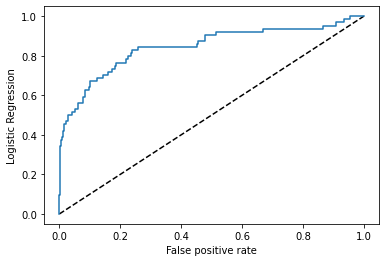

In [52]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('Logistic Regression')
plt.show()

# Saving the Model

In [53]:
import pickle

filename='HR_Analytics_new.pkl'
pickle.dump(lg,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(test_x)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,